In [9]:
# Importing the Keras libraries and packages
# from keras.models import Sequential
# from keras.layers import Convolution2D
# from keras.layers import MaxPooling2D
# from keras.layers import Flatten
# from keras.layers import Dense
# from keras.models import model_from_json
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings("ignore")

import numpy as np
from matplotlib import pyplot as plt

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
batch_size = 64
base_dir = 'data'

In [6]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

In [7]:
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'Images',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['Avulsion fracture','Comminuted fracture','Compression-Crush fracture','Fracture Dislocation',
                  'Greenstick fracture','Hairline Fracture','Impacted fracture','Intra-articular fracture',
                  'Longitudinal fracture','Oblique fracture','Pathological fracture','Spiral Fracture'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 1685 images belonging to 12 classes.


In [8]:
model = tf.keras.models.Sequential([
        # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
        # The first convolution
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The second convolution
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The third convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The fourth convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The fifth convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # Flatten the results to feed into a dense layer
        tf.keras.layers.Flatten(),
        # 128 neuron in the fully-connected layer
        tf.keras.layers.Dense(128, activation='relu'),
        # 5 output neurons for 5 classes with the softmax activation
        tf.keras.layers.Dense(12, activation='softmax')
    ])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 230,188 (899.17 KB)

 Trainable params: 230,188 (899.17 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

total_sample=train_generator.n

n_epochs = 30

In [11]:

history = model.fit(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=n_epochs,
        verbose=1)

Epoch 1/30


2024-04-02 21:09:40.763524: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 160579584 exceeds 10% of free system memory.


 1/26 ━━━━━━━━━━━━━━━━━━━━ 1:45 4s/step - acc: 0.0625 - loss: 2.5090

2024-04-02 21:09:41.506818: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 160579584 exceeds 10% of free system memory.
2024-04-02 21:09:41.704558: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 160579584 exceeds 10% of free system memory.


 2/26 ━━━━━━━━━━━━━━━━━━━━ 18s 753ms/step - acc: 0.0547 - loss: 2.5055

2024-04-02 21:09:42.270628: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 160579584 exceeds 10% of free system memory.
2024-04-02 21:09:42.455175: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 160579584 exceeds 10% of free system memory.


26/26 ━━━━━━━━━━━━━━━━━━━━ 28s 961ms/step - acc: 0.0974 - loss: 2.4850
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.0625 - loss: 1.2915
Epoch 3/30


2024-04-02 21:10:07.081521: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


26/26 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - acc: 0.1193 - loss: 2.4676
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 203us/step - acc: 0.1250 - loss: 1.2761 
Epoch 5/30


2024-04-02 21:10:37.811600: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


26/26 ━━━━━━━━━━━━━━━━━━━━ 22s 761ms/step - acc: 0.1456 - loss: 2.4242
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 192us/step - acc: 0.1094 - loss: 1.2624 
Epoch 7/30


2024-04-02 21:11:00.226334: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 750ms/step - acc: 0.1465 - loss: 2.3832
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 197us/step - acc: 0.1875 - loss: 1.2088 
Epoch 9/30


2024-04-02 21:11:22.409783: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 743ms/step - acc: 0.1814 - loss: 2.3208
Epoch 10/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 215us/step - acc: 0.1562 - loss: 1.2335 
Epoch 11/30


2024-04-02 21:11:44.517824: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


26/26 ━━━━━━━━━━━━━━━━━━━━ 22s 774ms/step - acc: 0.2200 - loss: 2.2411
Epoch 12/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 183us/step - acc: 0.2500 - loss: 1.1247 
Epoch 13/30


2024-04-02 21:12:07.445884: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


26/26 ━━━━━━━━━━━━━━━━━━━━ 23s 792ms/step - acc: 0.2702 - loss: 2.1483
Epoch 14/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 239us/step - acc: 0.2969 - loss: 1.1442 
Epoch 15/30


2024-04-02 21:12:31.601672: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


26/26 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - acc: 0.3073 - loss: 2.0272
Epoch 16/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 197us/step - acc: 0.3125 - loss: 1.0600 
Epoch 17/30


2024-04-02 21:13:01.338094: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


26/26 ━━━━━━━━━━━━━━━━━━━━ 28s 956ms/step - acc: 0.3725 - loss: 1.8854
Epoch 18/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 249us/step - acc: 0.2500 - loss: 1.2000 
Epoch 19/30


2024-04-02 21:13:30.047752: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


26/26 ━━━━━━━━━━━━━━━━━━━━ 39s 952ms/step - acc: 0.4104 - loss: 1.7639
Epoch 20/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 252us/step - acc: 0.4375 - loss: 0.8733 
Epoch 21/30


2024-04-02 21:14:10.331350: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 974ms/step - acc: 0.4615 - loss: 1.5874
Epoch 22/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 211us/step - acc: 0.5312 - loss: 0.8001 
Epoch 23/30


2024-04-02 21:14:52.249361: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


26/26 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - acc: 0.5421 - loss: 1.4156
Epoch 24/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 566us/step - acc: 0.5000 - loss: 0.7754
Epoch 25/30


2024-04-02 21:15:23.031558: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


26/26 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - acc: 0.5795 - loss: 1.2644
Epoch 26/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 195us/step - acc: 0.5625 - loss: 0.6211
Epoch 27/30


2024-04-02 21:15:54.585656: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


26/26 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - acc: 0.6524 - loss: 1.1046
Epoch 28/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 202us/step - acc: 0.5469 - loss: 0.7287
Epoch 29/30


2024-04-02 21:16:24.945924: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - acc: 0.6464 - loss: 1.0506
Epoch 30/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 181us/step - acc: 0.6406 - loss: 0.5635


2024-04-02 21:16:57.110447: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [17]:
model.save('model.h5')

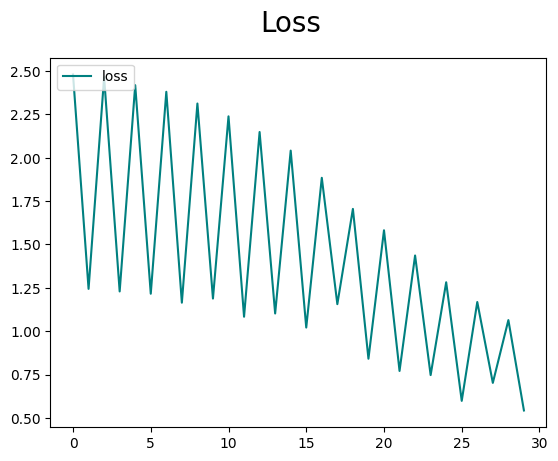

In [18]:
#Visualizing loss:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal',label='loss')
#plt.plot(history.history['val_loss'], color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

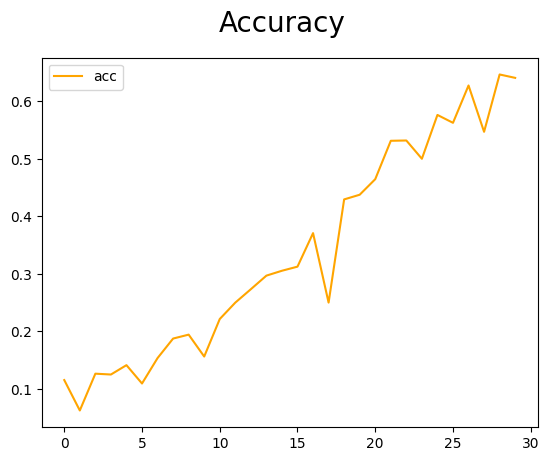

In [19]:
#Visualizing loss:
fig = plt.figure()
plt.plot(history.history['acc'], color='orange',label='acc')
#plt.plot(history.history['val_loss'], color='orange',label='val_loss')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [2]:
import numpy as np
from tensorflow.keras.preprocessing import image


2024-04-03 13:22:31.168886: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-03 13:22:31.258046: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-03 13:22:31.590763: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-03 13:22:32.922835: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [10]:
model = tf.keras.models.load_model('model.h5')

In [102]:
test_image = image.load_img('./Images/Fracture Dislocation/Fracture Dislocation/c51fc85c72384555edf1d6ec412e53_jumbo.jpg', target_size = (200,200))

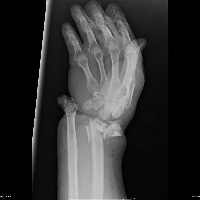

In [103]:
test_image

In [104]:
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [105]:
result

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [106]:
if result[0][0] == 1:
    print("Avulsion Fracture")
elif result[0][1] == 1:
    print("Comminuted fracture")
elif result[0][2] == 1:
    print("Compression-Crush fracture")
elif result[0][3] == 1:
    print("Fracture Dislocation")
elif result[0][4] == 1:
    print("Greenstick fracture")
elif result[0][5] == 1:
    print("Hairline fracture")
elif result[0][6] == 1:
    print("Impacted Dislocation")
elif result[0][7] == 1:
    print("Intra-articluar fracture")
elif result[0][8] == 1:
    print("Longitudinal fracture")
elif result[0][9] == 1:
    print("Oblique Dislocation")
elif result[0][10] == 1:
    print("Pathological fracture")
elif result[0][11] == 1:
    print("Spiral fracture")
else:
    print("Unknown")

Fracture Dislocation
